In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_rows', None)
raw = pd.read_csv('winemag-data_first150k.csv')

review = raw.copy(deep=True).drop('Unnamed: 0', axis=1)
review.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


The data consists of 10 fields:

- *Points*: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- *Title*: the title of the wine review, which often contains the vintage if you're interested in extracting that feature
- *Variety*: the type of grapes used to make the wine (ie Pinot Noir)
- *Description*: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- *Country*: the country that the wine is from
- *Province*: the province or state that the wine is from
- *Region 1*: the wine growing area in a province or state (ie Napa)
- *Region 2*: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- *Winery*: the winery that made the wine
- *Designation*: the vineyard within the winery where the grapes that made the wine are from
- *Price*: the cost for a bottle of the wine 
- *Taster Name*: name of the person who tasted and reviewed the wine
- *Taster Twitter Handle*: Twitter handle for the person who tasted ane reviewed the wine

In [2]:
review.info() # (150930, 10)
total_sample = len(review.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [3]:
review.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


country has 5 missing value , with 0.0033% missing rate
designation has 45735 missing value , with 30.3021% missing rate
price has 13695 missing value , with 9.0737% missing rate
province has 5 missing value , with 0.0033% missing rate
region_1 has 25060 missing value , with 16.6037% missing rate
region_2 has 89977 missing value , with 59.6151% missing rate


Text(0.5, 1.0, 'Missing Value')

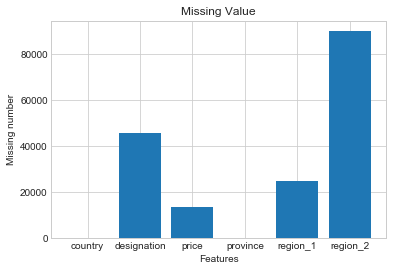

In [4]:
# Features has missing values
feat = list()
missing_num = list()

for col in review.columns:
    if True in review[col].isnull().values:
        feat.append(col)
        number = review[col].isnull().sum()
        missing_num.append(number)
        print(col, 'has {} missing value'.format(number), \
              ', with {0:.4f}% missing rate'.format(number / total_sample * 100))

x, y = feat, missing_num
plt.bar(x, y, alpha=1)
plt.xlabel('Features')
plt.ylabel('Missing number')
plt.title('Missing Value')

In [5]:
# Descriptiom
review = review.drop(['description'], axis=1)
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
# Country
countries = review.country.unique() # nan
countries

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [7]:
review.country.isnull().sum()

5

In [8]:
review.loc[pd.isnull(review.country)]

,country,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [9]:
# encoding Country
print('Country number:', len(countries))
country_dict = dict()
review.loc[pd.isnull(review['country']), ['country']] = 'Beijing'
# null_ID = review[pd.isnull(review['country'])].index
# print(null_ID)
# notnull_ID = list(set(review.index) - set(null_ID))
# tmp_review = review.iloc[notnull_ID]
# countries = tmp_review['country'].unique()
countries = review.country.unique()
for i in range(len(countries)):
    country_dict[countries[i]] = i

for c in countries:
    review['country'] = review['country'].replace(c, country_dict[c])

review.head()
# review.loc[review['country'] == -1]

Country number: 49


,country,designation,points,price,province,region_1,region_2,variety,winery
0,0,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,0,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,0,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,2,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [10]:
# Designation
des = review.designation.unique()
len(des)

30622

In [11]:
review.designation.isnull().sum()

45735

In [12]:
review.loc[pd.isnull(review.designation)].head()

,country,designation,points,price,province,region_1,region_2,variety,winery
36,2,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,3,NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,3,NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
48,3,NaN,90,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia
49,0,NaN,90,40.0,Washington,Red Mountain,Columbia Valley,Cabernet Sauvignon,Canvasback


In [13]:
# encoding designation
null_ID = review[pd.isnull(review['designation'])].index
notnull_ID = list(set(review.index) - set(null_ID))
des = review.iloc[notnull_ID]
des = des['designation'].unique()
# print(des)
des_dict = dict()
for i in range(len(des)):
    des_dict[des[i]] = i
# print(des_dict)
for d in des:
    review['designation'] = review['designation'].replace(d, des_dict[d])
review.loc[null_ID, ['designation']] = -1
review.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery
0,0,0.0,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,1.0,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,0,2.0,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,0,3.0,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,2,4.0,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,1,5.0,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,1,6.0,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,1,7.0,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,0,8.0,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,0,9.0,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [15]:
# Points
p = review.points.unique()
p # no missing point

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80])

In [17]:
(review['points'] == 100).sum()

24

In [18]:
review['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

Text(0.5, 1.0, 'Point Distribution')

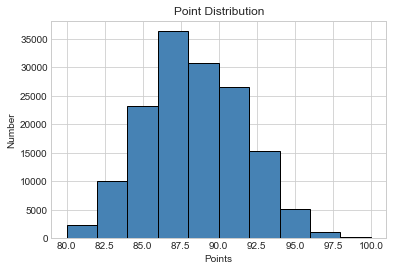

In [19]:
plt.hist(review['points'],  density=False, alpha=1,
        histtype='bar', color='steelblue', 
        edgecolor='k')
plt.xlabel('Points')
plt.ylabel('Number')
plt.title('Point Distribution')

In [20]:
# encoding points
point_mean = review['points'].mean()
review.loc[(review['points'] > 96) & (review['points'] <= 100), 'points'] = 1
review.loc[(review['points'] > 92) & (review['points'] <= 96), 'points'] = 2
review.loc[(review['points'] > 88) & (review['points'] <= 92), 'points'] = 3
review.loc[(review['points'] > 84) & (review['points'] <= 88), 'points'] = 4
review.loc[(review['points'] >= 80) & (review['points'] <= 84), 'points'] = 5
review.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery
0,0,0.0,2,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,1.0,2,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,0,2.0,2,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,0,3.0,2,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,2,4.0,2,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,1,5.0,2,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,1,6.0,2,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,1,7.0,2,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,0,8.0,2,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,0,9.0,2,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [21]:
# Price
price_counts = review.price.value_counts()
price_counts.head(10)

20.0    7860
15.0    7056
18.0    5988
25.0    5955
30.0    5449
10.0    5255
12.0    4950
13.0    4479
16.0    4273
35.0    4194
Name: price, dtype: int64

In [22]:
pd.isnull(review.price).sum()

13695

In [23]:
review['price'].unique()[: 40]

array([235., 110.,  90.,  65.,  66.,  73.,  60.,  80.,  48., 185., 325.,
       290.,  75.,  24.,  79., 220.,  45.,  57.,  62., 105.,  15.,  37.,
        nan,  22.,  42., 135.,  29.,  23.,  17.,  26.,  55.,  39.,  69.,
        30.,  50.,  40., 100.,  68.,  28.,  18.])

In [24]:
review['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [25]:
# row first, column second
review.loc[pd.isnull(review.price), ['country', 'points']].head(10)

,country,points
32,3,3
56,2,3
72,3,3
82,3,3
116,1,4
242,2,4
261,2,4
282,2,3
294,2,3
323,1,2


In [26]:
review.loc[pd.isnull(review.price)].head()

,country,designation,points,price,province,region_1,region_2,variety,winery
32,3,31.0,3,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,2,45.0,3,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,3,57.0,3,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,3,64.0,3,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,1,88.0,4,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


Text(0.5, 1.0, 'Price Distribution')

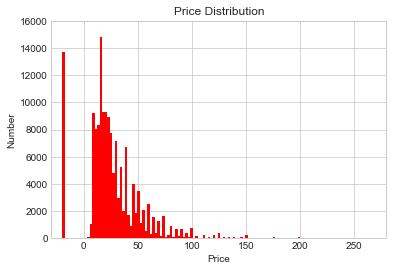

In [27]:
review['price'] = review['price'].apply(lambda x: -20.0 if pd.isnull(x) else x)

plt.hist(review['price'], alpha=1, color='r',
         histtype='bar', density=False,
         bins=1000)
plt.axis([-30, 280, 0, 16000])
plt.xlabel('Price')
plt.ylabel('Number')
plt.title('Price Distribution')
# list(review[review['price'] > 200].index)

In [28]:
# encoding price
# min(except -20): 4, max: 2300
null_ID = review[pd.isnull(review['price'])].index
review.loc[null_ID, ['price']] = -1
# notnull_ID = list(set(review.index) - set(null_ID))
# temp_review = review.iloc[notnull_ID]
# srt = sorted(set(temp_review['price'].values))
# interval = np.ceil((srt[-1] - srt[1]) / 100) # 23
price = review['price'].unique()
# print(price)
for i in price:
    review['price'] = review['price'].replace(i, np.floor(i / 100) + 1)

review.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery
0,0,0.0,2,3.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,1.0,2,2.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,0,2.0,2,1.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,0,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,2,4.0,2,1.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,1,5.0,2,1.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,1,6.0,2,1.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,1,7.0,2,2.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,0,8.0,2,1.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,0,9.0,2,1.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [29]:
# Province
prov = review.province.unique()
len(prov)

456

In [30]:
pd.isnull(review.province).sum()

5

In [31]:
prov[: 40]

array(['California', 'Northern Spain', 'Oregon', 'Provence',
       'Northeastern Italy', 'Southwest France', 'Kumeu', 'Washington',
       'Bulgaria', 'Tuscany', 'France Other', 'Rhône Valley', 'Galicia',
       'Andalucia', 'Idaho', 'Burgundy', 'Loire Valley', 'New York',
       'Mendoza Province', 'Victoria', 'Alentejano', 'Piedmont',
       'Alentejo', 'Champagne', 'Upper Galilee', 'Beira Atlantico',
       'Veneto', 'Douro', 'Tejo', 'Stellenbosch', 'Levante',
       'Sicily & Sardinia', 'Southern Italy', 'Languedoc-Roussillon',
       'Bordeaux', 'Atalanti Valley', 'Catalonia', 'Santorini', 'Florina',
       'Marchigue'], dtype=object)

In [32]:
review.loc[pd.isnull(review.province)]

,country,designation,points,price,province,region_1,region_2,variety,winery
1133,22,729.0,3,1.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,22,902.0,3,1.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,22,22334.0,5,1.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,22,22334.0,5,1.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,22,22334.0,5,1.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [33]:
# encoding province
review.loc[pd.isnull(review['province']), ['province']] = 'Beijing'

"""
prov_dict = dict()
for p in range(len(prov)):
    prov_dict[prov[p]] = p
for p in prov:
    review['province'] = review['province'].replace(p, prov_dict[p])
review.head()
"""
review.loc[review['province'] == 'Beijing']

,country,designation,points,price,province,region_1,region_2,variety,winery
1133,22,729.0,3,1.0,Beijing,NaN,NaN,Assyrtiko,Tsililis
1440,22,902.0,3,1.0,Beijing,NaN,NaN,Red Blend,Büyülübağ
68226,22,22334.0,5,1.0,Beijing,NaN,NaN,Pinot Noir,Chilcas
113016,22,22334.0,5,1.0,Beijing,NaN,NaN,Pinot Noir,Chilcas
135696,22,22334.0,5,1.0,Beijing,NaN,NaN,Pinot Noir,Chilcas


In [34]:
# review.to_csv('temp.csv')

In [35]:
# region_1
region1 = review.region_1.unique()
region1

array(['Napa Valley', 'Toro', 'Knights Valley', ..., 'Listrac',
       'St.-Amour', 'Coteaux du Tricastin'], dtype=object)

In [36]:
len(region1)

1237

In [37]:
review.region_1.isnull().sum()

25060

In [38]:
review.loc[pd.isnull(review['region_1'])].head()

,country,designation,points,price,province,region_1,region_2,variety,winery
25,4,24.0,2,1.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,5,29.0,3,1.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
42,0,37.0,3,1.0,Idaho,NaN,NaN,Petite Sirah,Huston
64,8,-1.0,3,1.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
74,8,58.0,3,1.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba


In [39]:
# region_2
region2 = review['region_2'].unique()
region2

array(['Napa', nan, 'Sonoma', 'Willamette Valley', 'Central Coast',
       'Columbia Valley', 'Finger Lakes', 'California Other',
       'Mendocino/Lake Counties', 'South Coast', 'Central Valley',
       'New York Other', 'Sierra Foothills', 'Southern Oregon',
       'Oregon Other', 'Napa-Sonoma', 'North Coast', 'Washington Other',
       'Long Island'], dtype=object)

In [40]:
len(region2)

19

In [41]:
pd.isnull(review['region_2']).sum()

89977

In [42]:
review.loc[review['region_2'].isnull()].head()

,country,designation,points,price,province,region_1,region_2,variety,winery
1,1,1.0,2,2.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,2,4.0,2,1.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,1,5.0,2,1.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,1,6.0,2,1.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,1,7.0,2,2.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [54]:
# merge region_1 and region_2 to new feature region
review.loc[pd.isnull(review['region_2']), ['region_2']] = ''
review.loc[pd.isnull(review['region_1']), ['region_1']] = ''
review.loc[:, 'region'] = review.loc[:, 'province'] + ' ' + review.loc[:, 'region_1'] + ' ' + review.loc[:, 'region_2']
# review.loc[:, 'region'] = review.loc[:, 'region_1'] + ' ' + review.loc[:, 'region_2']
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,2,3.0,California,Napa Valley,Napa,0,0,California Napa Valley Napa
1,1,1.0,2,2.0,Northern Spain,Toro,,1,1,Northern Spain Toro
2,0,2.0,2,1.0,California,Knights Valley,Sonoma,2,2,California Knights Valley Sonoma
3,0,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,3,3,Oregon Willamette Valley Willamette Valley
4,2,4.0,2,1.0,Provence,Bandol,,4,4,Provence Bandol


In [44]:
# encoding region
"""
null_ID = review[pd.isnull(review['region_1'])].index
new_ID = list(set(review.index) - set(null_ID))
review = review.iloc[new_ID]
"""
review.region.head()

0                   California Napa Valley Napa
1                          Northern Spain Toro 
2              California Knights Valley Sonoma
3    Oregon Willamette Valley Willamette Valley
4                              Provence Bandol 
Name: region, dtype: object

In [45]:
region = review['region'].unique()
print(len(region))
region_dict = dict()
for r in range(len(region)):
    region_dict[region[r]] = r
for reg in region:
    review['region'] = review['region'].replace(reg, region_dict[reg])
    # review.loc[review['region'] == reg, ['region']] = region_dict[reg]
review.head()

1638


,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,2,3.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0
1,1,1.0,2,2.0,Northern Spain,Toro,,Tinta de Toro,Bodega Carmen Rodríguez,1
2,0,2.0,2,1.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,2
3,0,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,3
4,2,4.0,2,1.0,Provence,Bandol,,Provence red blend,Domaine de la Bégude,4


In [46]:
# Variety 
variety = review['variety'].unique()
len(variety)

632

In [47]:
variety[: 20]

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino'],
      dtype=object)

In [48]:
# encoding variety
variety_dict = dict()
for v in range(len(variety)):
    variety_dict[variety[v]] = v
for var in variety:
    review['variety'] = review['variety'].replace(var, variety_dict[var])
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,2,3.0,California,Napa Valley,Napa,0,Heitz,0
1,1,1.0,2,2.0,Northern Spain,Toro,,1,Bodega Carmen Rodríguez,1
2,0,2.0,2,1.0,California,Knights Valley,Sonoma,2,Macauley,2
3,0,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,3,Ponzi,3
4,2,4.0,2,1.0,Provence,Bandol,,4,Domaine de la Bégude,4


In [49]:
# Winery
winery = review['winery'].unique()
len(winery)

14810

In [50]:
winery[: 20]

array(['Heitz', 'Bodega Carmen Rodríguez', 'Macauley', 'Ponzi',
       'Domaine de la Bégude', 'Numanthia', 'Maurodos', 'Bergström',
       'Blue Farm', 'Borgo del Tiglio', 'Patricia Green Cellars',
       'Vignobles Brumont', 'Domaine Serene', 'Hall', 'Valduero',
       'Château Lagrézette', 'Gary Farrell', 'Muga', 'Center of Effort',
       'Comartin'], dtype=object)

In [51]:
# encoding winery
winery_dict = dict()
for w in range(len(winery)):
    winery_dict[winery[w]] = w
for win in winery:
    review['winery'] = review['winery'].replace(win, winery_dict[win])
review.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,0.0,2,3.0,California,Napa Valley,Napa,0,0,0
1,1,1.0,2,2.0,Northern Spain,Toro,,1,1,1
2,0,2.0,2,1.0,California,Knights Valley,Sonoma,2,2,2
3,0,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,3,3,3
4,2,4.0,2,1.0,Provence,Bandol,,4,4,4


In [52]:
review.shape

(150930, 10)

In [53]:
review.to_csv('wine_vector_2.csv')